**Examples**

Pharmacokinetics

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

Getting the Data

In [3]:
download('https://github.com/AllenDowney/ModSim/raw/main/data/' +
         'glucose_insulin.csv')
'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

Downloaded glucose_insulin.csv


'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

In [4]:
from pandas import read_csv
data = read_csv('glucose_insulin.csv', index_col='time')

In [5]:
data.head()

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51


Interpolation

In [6]:
I = interpolate(data.insulin)
I(20)

array(30.)

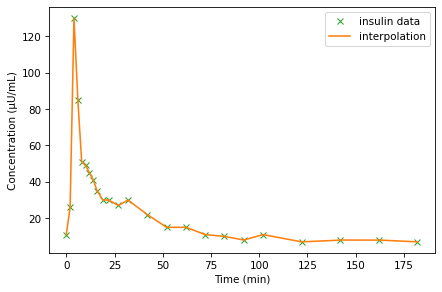

In [7]:
T_ini = data.index[0]
t_end = data.index[-1]
T_arr = linrange(T_ini, t_end)
I_arr = I(T_arr)
I_series = make_series(T_arr, I_arr)
data.insulin.plot(style='x', color='C2', label='insulin data')
I_series.plot(color='C1', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

**Exercises**

Exercise 1

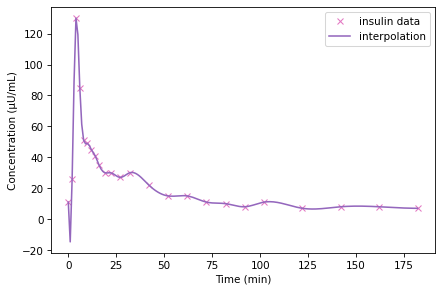

In [8]:
I = interpolate(data.insulin, kind='cubic')
I_arr = I(T_arr)
I_series = make_series(T_arr, I_arr)
data.insulin.plot(style='x', color='C6', label='insulin data')
I_series.plot(color='C4', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

In [9]:
# Cubic interpolation smoother, more appropriate for this data, varies smoothly over time.
# Can extend beyond range of data; some interpolated values are negative, concentrations cannot be negative.
# So, use linear interpolation.

Exercise 2

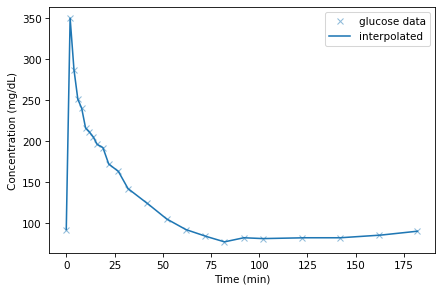

In [11]:
G = interpolate(data.glucose)
G_arr = G(T_arr)
G_series = make_series(T_arr, G_arr)
data.glucose.plot(style='x', alpha=0.5, label='glucose data')
G_series.plot(color='C0', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')